<a href="https://colab.research.google.com/github/libra3910/diveintocode-ml/blob/master/ML2101%E6%9C%9F_WEEK4_%E9%81%A0%E8%97%A4%E4%BC%B8_%E6%8E%88%E6%A5%AD%E5%89%8D%E8%AA%B2%E9%A1%8C2_%E4%BD%8F%E5%AE%85%E4%BE%A1%E6%A0%BC%E3%81%AE%E4%BA%88%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML2101期_WEEK4_遠藤伸_授業前課題2_住宅価格の予測

# 【問題1】練習のために特徴量の選択

In [ ]:
import pandas as pd

DATA_DIR='C:/Users/es/Documents/Python Scripts/Week4/'
data = pd.read_csv(f'{DATA_DIR}train.csv')

In [ ]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
X = data.loc[:,['GrLivArea','YearBuilt']]

In [ ]:
y = data.loc[:,['SalePrice']]

In [ ]:
df = pd.concat([X,y],axis=1)

In [ ]:
df

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000
...,...,...,...
1455,1647,1999,175000
1456,2073,1978,210000
1457,2340,1941,266500
1458,1078,1950,142125


# 【問題2】線形回帰による推定と評価

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
X.isnull().sum()

GrLivArea    0
YearBuilt    0
dtype: int64

In [ ]:
y.isnull().sum()

SalePrice    0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 43)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train, X_test)

StandardScaler()

In [ ]:
scaler.mean_

array([1513.2283105 , 1970.96621005])

In [ ]:
X_train_std = scaler.transform(X_train)

In [ ]:
X_test_std = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()
reg = lm.fit(X_train_std, y_train)
reg.score(X_train_std, y_train)

0.6459025410656976

In [ ]:
reg.coef_

array([[49689.64749538, 31257.90732964]])

In [ ]:
reg.intercept_

array([180109.18173516])

In [ ]:
y_pred = reg.predict(X_test_std)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred, squared = True)

In [ ]:
print("線形回帰のRMSE={}".format(round(np.sqrt(mse))))

線形回帰のRMSE=46243


# 【問題3】手法の比較

## SVM(SupportVectorMachine)

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X_train_std, y_train)

C:\Users\es\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [ ]:
y_pred = regr.predict(X_test_std)

In [ ]:
mse = mean_squared_error(y_test, y_pred, squared = True)

In [ ]:
print("SVMのRMSE={}".format(round(np.sqrt(mse))))

SVMのRMSE=84357


## 決定木

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state = 0)
dt.fit(X_train_std, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
y_pred = dt.predict(X_test_std)

In [ ]:
mse = mean_squared_error(y_test, y_pred, squared = True)

In [ ]:
print("回帰木のRMSE={}".format(round(np.sqrt(mse))))

回帰木のRMSE=57233


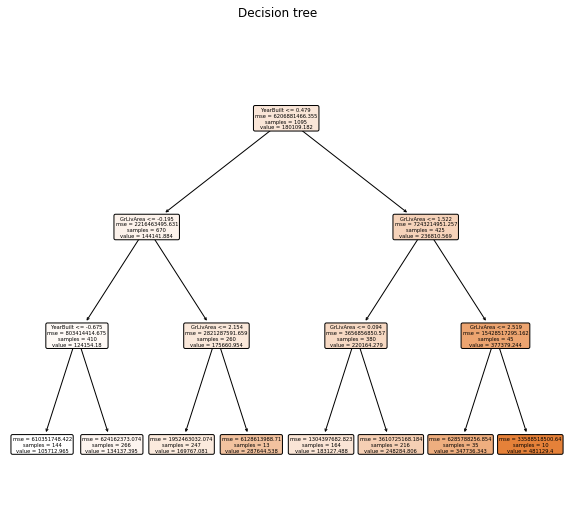

In [ ]:
from sklearn.tree import plot_tree
dt = DecisionTreeRegressor(max_depth=3,random_state = 0)
dt.fit(X_train_std, y_train)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot()
ax = plot_tree(dt,
  feature_names=X.columns,
  filled=True,
  rounded=True,
  )
plt.suptitle("Decision tree")
plt.show()

## ランダムフォレスト

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 0)
rf.fit(X_train_std, y_train)

<ipython-input-187-aa2df95c36bc>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_std, y_train)


RandomForestRegressor(random_state=0)

In [ ]:
y_pred = rf.predict(X_test_std)

In [ ]:
mse = mean_squared_error(y_test, y_pred, squared = True)

In [ ]:
print("ランダムフォレストのRMSE={}".format(round(np.sqrt(mse))))

ランダムフォレストのRMSE=43352
